In [1]:
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math

C:\Users\dell\AppData\Local\Temp\ipykernel_1048\2742036733.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(no buff)'][i] = N1 * 10**21 / 12 / n0


    Year  carbon emission(Pg)    mean  CO2 level in ppm(no buff)
0   1986                5.583  347.61                 347.000000
1   1987                5.725  349.31                 349.476592
2   1988                5.936  351.69                 350.822203
3   1989                6.066  353.20                 352.200804
4   1990                6.074  354.45                 353.553674
5   1991                6.142  355.70                 354.915942
6   1992                6.078  356.54                 356.226925
7   1993                6.070  357.21                 357.522571
8   1994                6.174  358.96                 358.858888
9   1995                6.305  360.97                 360.243684
10  1996                6.448  362.74                 361.677174
11  1997                6.556  363.88                 363.138118
12  1998                6.576  366.84                 364.583983
13  1999                6.561  368.54                 366.003269
14  2000                6

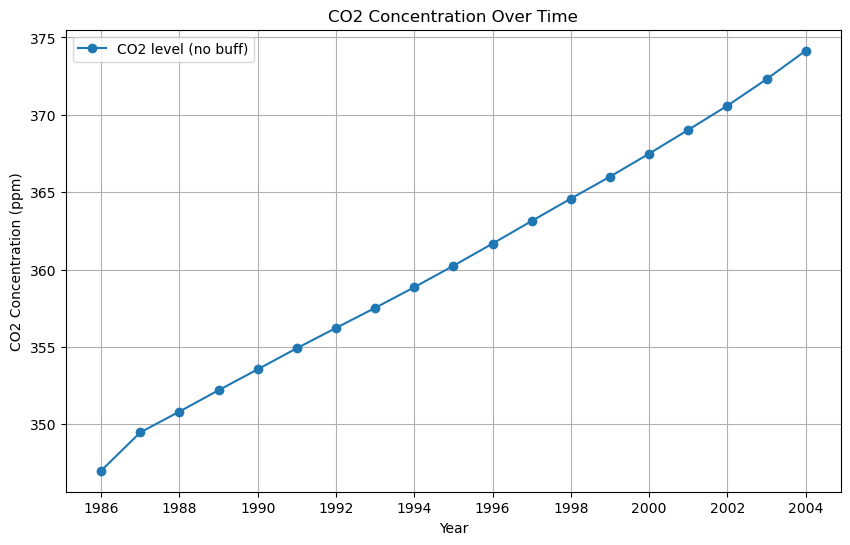

In [2]:
#Question 1.1

# 读取CO2的数据
df = pd.read_csv("D:\\ESE_5023\\co2_annmean_mlo.csv")
# 处理数据，使得其index从0开始，保留1986-2004的数据
df = df.iloc[1:, 0:2]
df = df.loc[(df['year'] > 1985) & (df['year'] < 2005)]       
df = df.reset_index(drop=True)
#读取CO2排放的数据
da = pd.read_csv('global.1751_2014.csv')
da['Year'] = pd.to_numeric(da['Year'], errors='coerce')      # 将 'Year' 列的数据转换为数值类型
da['Year'] = da['Year'].fillna(0).astype(int)                # 去除缺失值并将 'Year' 列转换为整数类型
da = da.loc[(da['Year'] > 1985) & (da['Year'] < 2005)]      # 筛选指定年份范围的数据
da = da.reset_index(drop=True)                              # 重设index
da = da.iloc[:, [0, 1]]

#数据取到1986年开始，定义1986 CO2=347，方便计算，consult with malinqiang

# 合并数据
data = pd.concat([da, df], axis=1)
data = data.drop('year', axis=1)  #删掉了多余的一列year
data = data.rename(columns={'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)': 'carbon emission(Pg)'})  #名称太长，重命名

# 数据处理
data['carbon emission(Pg)'] = pd.to_numeric(data['carbon emission(Pg)'], errors='coerce') # 将数据转换为数值类型
data['carbon emission(Pg)'] = data['carbon emission(Pg)'] / 1000  #之前忘记除1000了，补上，这样才是Pg的值
data['CO2 level in ppm(no buff)'] = 347  #创建了"CO2 level in ppm(no buff)"列，并初始化为347。

# 模型参数初始化
k12, k21 = 105 / 740, 102 / 900
N1, N2 = 740, 900
n0 = 740 * 10**21 / 12 / 347  #大气分子总数，之后用CO2的数来除以总数，得出ppm
gamma = data['carbon emission(Pg)']  #E1中的额外源

# 模拟CO2浓度的变化
for i in range(len(data)):
    dN1 = -k12 * N1 + k21 * N2 + gamma[i]
    dN2 = k12 * N1 - k21 * N2
    N1 += dN1
    N2 += dN2         #根据模型方程计算了CO2的变化，然后更新了N1和N2的值
    if i != 0:        #0为1986年
        data['CO2 level in ppm(no buff)'][i] = N1 * 10**21 / 12 / n0

# 输出数据
print(data)

# 画图
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['CO2 level in ppm(no buff)'],marker='o', label='CO2 level (no buff)')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()
plt.grid(True)

# 设置横坐标刻度为整数形式，否则会以float的形式显示
plt.xticks(range(1986, 2005, 2))
plt.show()

    Year  carbon emission(Pg)    mean  CO2 level in ppm(no buff)  \
0   1987                5.725  349.31                 349.476592   
1   1988                5.936  351.69                 350.822203   
2   1989                6.066  353.20                 352.200804   
3   1990                6.074  354.45                 353.553674   
4   1991                6.142  355.70                 354.915942   
5   1992                6.078  356.54                 356.226925   
6   1993                6.070  357.21                 357.522571   
7   1994                6.174  358.96                 358.858888   
8   1995                6.305  360.97                 360.243684   
9   1996                6.448  362.74                 361.677174   
10  1997                6.556  363.88                 363.138118   
11  1998                6.576  366.84                 364.583983   
12  1999                6.561  368.54                 366.003269   
13  2000                6.733  369.71           

C:\Users\dell\AppData\Local\Temp\ipykernel_1048\1694614720.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CO2 level in ppm(buff)'][year - 1986] = N1 * 10**21 / 12 / n0


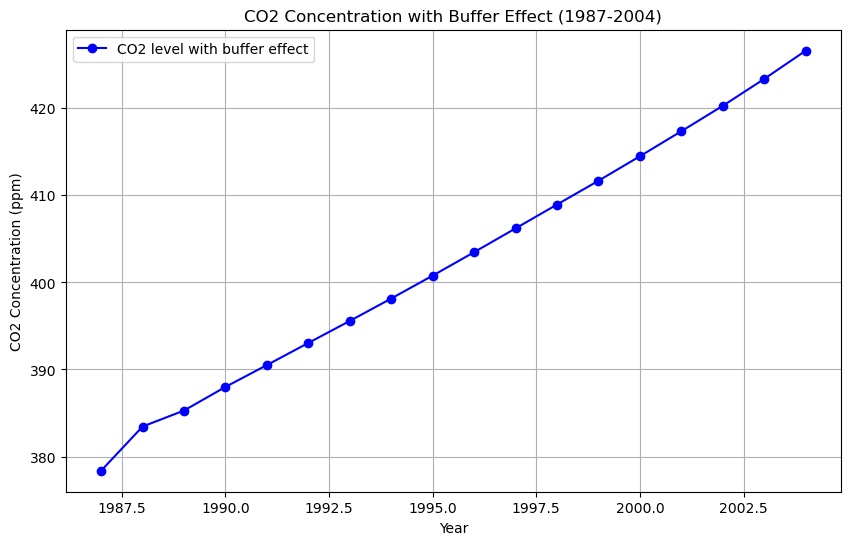

In [3]:
# Question 1.2

k12, k21 = 105/740, 102/900 
N1, N2, N20= 740, 900, 821
year = 1986
n0 = 740*10**21/12/347 
bf = 0  
data['CO2 level in ppm(buff)'] = 347   # 建立新的一列CO2 level in ppm(buff)，初始化为347。方便后面计算
for year in range(1986, 2005):
    if year - 1986 < len(data):
        bf = 3.69 + 1.86 * 0.01 * data['CO2 level in ppm(buff)'][year - 1986] - 1.8 * 10**(-6) * data['CO2 level in ppm(buff)'][year - 1986]**2

        dN1 = -k12 * N1 + k21 * (N20 + bf * (N2 - N20)) + gamma[year - 1986]
        dN2 = k12 * N1 - k21 * (N20 + bf * (N2 - N20))

        N1 += dN1
        N2 += dN2

        if year != 1986:
            data['CO2 level in ppm(buff)'][year - 1986] = N1 * 10**21 / 12 / n0

        bf = 3.69 + 1.86 * 0.01 * data['CO2 level in ppm(buff)'][year - 1986] - 1.8 * 10**(-6) * data['CO2 level in ppm(buff)'][year - 1986]**2

N1, N2 = 740, 900   # 防止每次输出结果会变化，设定初始值

data = data.drop(0).reset_index(drop=True)  # 除去无用的第0行，方便画图

print(data)

# 画出CO2 level in ppm(buff）的图
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['CO2 level in ppm(buff)'], marker='o', label='CO2 level with buffer effect', color='blue')
plt.title('CO2 Concentration with Buffer Effect (1987-2004)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.grid(True)
plt.legend()
plt.show()

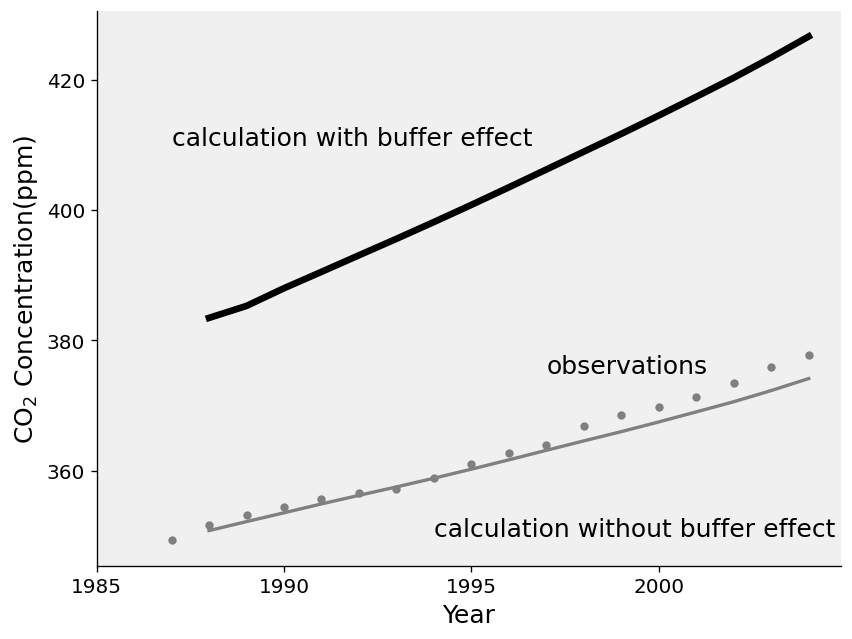

In [4]:
# 1.3

#将三种图结合
plt.figure(figsize=(8,6),dpi=120)
plt.plot(data['Year'],data['mean'],linewidth=0,marker='o',markersize=4,color='gray')
plt.plot(data['Year'][1:],data['CO2 level in ppm(buff)'][1:],linewidth=4,color='black')
plt.plot(data['Year'][1:],data['CO2 level in ppm(no buff)'][1:],linewidth=2,color='gray')

#设置标签
plt.xlabel('Year',fontsize=15)
plt.ylabel('CO$_2$ Concentration(ppm)',fontsize=15)

# 设置 x 轴和 y 轴刻度
plt.xticks([1985, 1990, 1995, 2000], fontsize=12)
plt.yticks([360, 380, 400, 420], fontsize=12)

# 插入文本
plt.text(1994, 350, 'calculation without buffer effect', fontsize=15, color='black')
plt.text(1997, 375, 'observations', fontsize=15, color='black')
plt.text(1987, 410, 'calculation with buffer effect', fontsize=15, color='black')

# 隐藏右边和上边的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 调整背景灰度
plt.gca().set_facecolor('#F0F0F0')  # 设置为浅灰色

plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_1048\3470349256.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'CO2 level in ppm({beta})'][year-1750] = N1 * 10**21 / 12 / n0


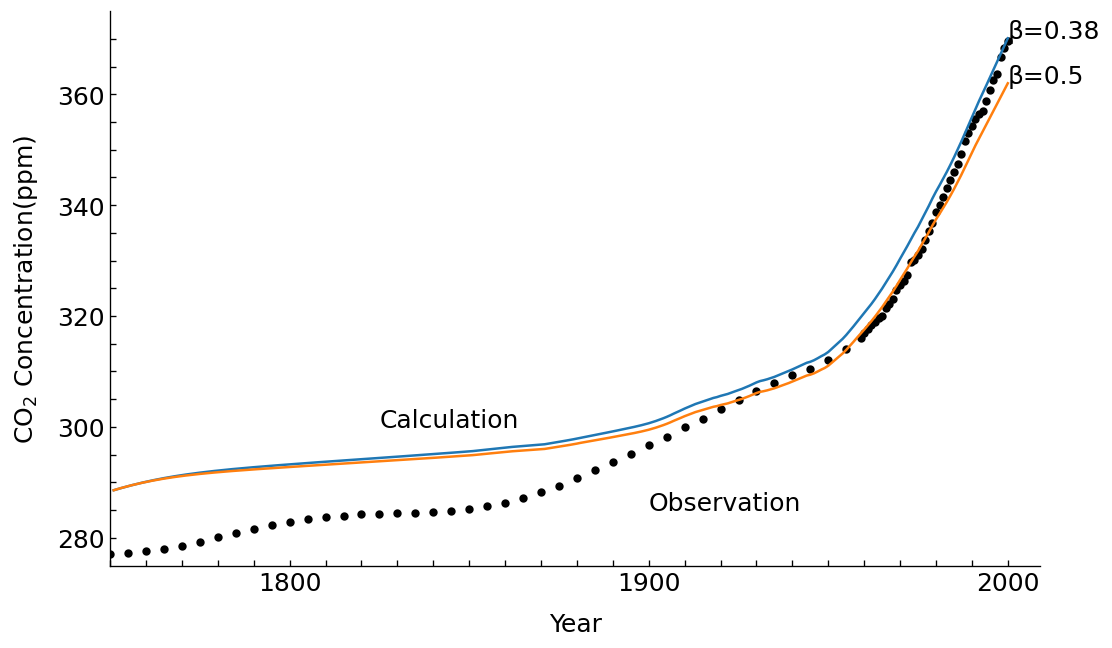

In [5]:
#bonus
#solve this problem with help from malinqiang

# 重新导入数据，之前的数据处理过，重新导入避免麻烦
data = pd.read_csv('global.1751_2014.csv')
observation = pd.read_csv('trends-in-atmospheric-carbon-dioxide-concentration.csv')
delta = pd.read_excel('Global_land-use_flux-1850_2005.xls')

# 数据处理过程
observation = observation[(observation['Category'] >= 1750) & (observation['Category'] <= 2000)] #仅保留在 1750 到 2000 之间的数据
data = data.iloc[1:, 0:2]
data['Year'] = data['Year'].astype(int)  #改变year的数据类型
data.loc[-1] = [1750, 3] #插入一行数据到索引 -1
data = data.sort_values('Year').reset_index(drop=True)
data = data[(data['Year'] >= 1750) & (data['Year'] <= 2000)].reset_index(drop=True)
data['Total carbon emission in pg'] = data['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(int) / 1000
data['Emission from land use change'] = delta['Global in pg']
data['CO2 level in ppm(0.38)'] = 289
data['CO2 level in ppm(0.5)'] = 289

# 定义 beta 值的列表
beta_values = [0.38, 0.50]
#循环遍历每个 beta 值。
for beta in beta_values:
    k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71 = 60/615, 60/842, 9/842, 43/842, 52/9744, 162/9744, 205/26280, 0.20/26280, 0.2/90000000, 62/731, 62/1328
    n0 = 740 * 10**21 / 12 / 347
    N1, N2, N3, N4, N5, N6, N7 = 615, 842, 9744, 26280, 90000000, 731, 1328
    N20 = 842
    f0, P0 = 62, 289
    gamma = data['Total carbon emission in pg']
    delta = data['Emission from land use change']
    data[f'CO2 level in ppm({beta})'] = 289   #在内部使用 for 循环迭代模型的每一年，从 1751 年到 2000 年。

    for year in range(1751, 2001):
        ksi = 3.69 + 1.86 * 10**(-2) * data[f'CO2 level in ppm({beta})'][year-1751] - 1.8 * 10**(-6) * data[f'CO2 level in ppm({beta})'][year-1751]**2
        f = f0 * (1 + beta * math.log(data[f'CO2 level in ppm({beta})'][year-1751] / P0))
        dN1 = -k12 * N1 + k21 * (N20 + ksi * (N2 - N20)) + gamma[year-1750] - f + delta[year-1750] + k71 * N7 + k51 * N5
        dN2 = k12 * N1 - k21 * (N20 + ksi * (N2 - N20)) - k23 * N2 + k32 * N3 - k24 * N2
        dN3 = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
        dN4 = k24 * N2 + k34 * N3 - k43 * N4 - k45 * N4
        dN5 = k45 * N4 - k51 * N5
        dN6 = f - k67 * N6 - 2 * delta[year-1750]
        dN7 = k67 * N6 - k71 * N7 + delta[year-1750]
        N1 += dN1
        N2 += dN2
        N3 += dN3
        N4 += dN4
        N5 += dN5
        N6 += dN6
        N7 += dN7    #这部分代码执行了模型的迭代计算，计算每一年各个组分的变化，其中包括 CO2 浓度在大气和海洋中的变化。
        data[f'CO2 level in ppm({beta})'][year-1750] = N1 * 10**21 / 12 / n0

plt.figure(figsize=(10, 6), dpi=120)
plt.plot(observation['Category'], observation['Ice Core & Mouna Loa'], linewidth=0, marker='o', markersize=4, color='black')
for beta in beta_values:
    plt.plot(data['Year'][1:], data[f'CO2 level in ppm({beta})'][1:], label=f'β={beta}')

plt.xlabel('Year', fontsize=15, labelpad=10)
plt.ylabel('CO$_2$ Concentration(ppm)', fontsize=15, labelpad=10)
plt.xticks(np.arange(1750, 2001, 10), [str(t) if t in np.arange(1800, 2001, 100) else '' for t in np.arange(1750, 2001, 10)], fontsize=15)
plt.yticks(np.arange(280, 375, 5), [str(t) if t in np.arange(280, 361, 20) else '' for t in np.arange(280, 375, 5)], fontsize=15)
plt.xlim([1750, 2009])
plt.ylim([275, 375])
plt.tick_params(axis='both', bottom=True, top=False, direction='in', which='major')

plt.text(1900, 285, 'Observation', fontsize=15, color='black')
plt.text(1825, 300, 'Calculation', fontsize=15, color='black')
for beta in beta_values:
    plt.text(2000, data[f'CO2 level in ppm({beta})'][2000-1750], f'β={beta}', fontsize=15)

# 去除上面和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
